In [1]:
import pandas as pd
import numpy as np

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
dates,df


(DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'),
              A   B   C   D
 2013-01-01   0   1   2   3
 2013-01-02   4   5   6   7
 2013-01-03   8   9  10  11
 2013-01-04  12  13  14  15
 2013-01-05  16  17  18  19
 2013-01-06  20  21  22  23)

In [2]:
print(df['A'])
print(df.A)
print()
print(df[0:3])
print(df['20130102':'20130104'])
print()


2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32

            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11
             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15



In [3]:
print(df.loc)
print()
print(df.loc['20130102'])
print()
print(df.loc[:,['A','B']])
print()
print(df.loc['20130102',['A','B']])




A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32

             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21

A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int32


In [4]:
print(df.iloc[3,1])
print(df.iloc[3:5,1:3])
print(df.iloc[[1,3,5],1:3])
print(df.iloc[[1,3,5],[1,3]])

13
             B   C
2013-01-04  13  14
2013-01-05  17  18
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22
             B   D
2013-01-02   5   7
2013-01-04  13  15
2013-01-06  21  23


In [5]:
print(df.A>8)
print(df[df.A>8])


2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04     True
2013-01-05     True
2013-01-06     True
Freq: D, Name: A, dtype: bool
             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [6]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)
df.iloc[2,2] = 1111
df.loc['20130101','B'] = 2222
print(df)

df.B[df.A>4] = 0
print(df)
# 长度必须对齐
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101',periods=6))
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23
             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     0  1111  11
2013-01-04  12     0    14  15
2013-01-05  16     0    18  19
2013-01-06  20     0    22  23
             A     B     C   D  E
2013-01-01   0  2222     2   3  1
2013-01-02   4     5     6   7  2
2013-01-03   8     0  1111  11  3
2013-01-04  12     0    14  15  4
2013-01-05  16     0    18  19  5
2013-01-06  20     0    22  23  6


In [7]:
# 有时候我们导入或处理数据, 会产生一些空的或者是 NaN 数据
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


In [8]:
# 如果想直接去掉有 NaN 的行或列, 可以使用 dropna
"""
data.dropna(how = 'all')    # 传入这个参数后将只丢弃全为缺失值的那些行
data.dropna(axis = 1)       # 丢弃有缺失值的列（一般不会这么做，这样会删掉一个特征）
data.dropna(axis=1,how="all")   # 丢弃全为缺失值的那些列
data.dropna(axis=0,subset = ["Age", "Sex"])   # 丢弃‘Age’和‘Sex’这两列中有缺失值的行

"""
df1= df.dropna(
    axis=1,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop
    )
print(df1)
df2= df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop
    )
print(df2)

             A   D
2013-01-01   0   3
2013-01-02   4   7
2013-01-03   8  11
2013-01-04  12  15
2013-01-05  16  19
2013-01-06  20  23
             A     B     C   D
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


In [9]:
df.fillna(value=0)



,A,B,C,D
2013-01-01,0,0.0,2.0,3
2013-01-02,4,5.0,0.0,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [10]:
# 检测在数据中是否存在 NaN, 如果存在就返回 True:
print(np.any(df.isnull()))
df.isnull()

True


,A,B,C,D
2013-01-01,False,True,False,False
2013-01-02,False,False,True,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


In [11]:
csv = """
Student ID,name ,age,gender
1100,Kelly,22,Female
1101,Clo,21,Female
1102,Tilly,22,Female
1103,Tony,24,Male
1104,David,20,Male
1105,Catty,22,Female
1106,M,3,Female
1107,N,43,Male
1108,A,13,Male
1109,S,12,Male
1110,David,33,Male
1111,Dw,3,Female
1112,Q,23,Male
1113,W,21,Female
"""
import io
data = pd.read_csv(io.StringIO(csv))

data

# data.to_pickle('student.pickle')

,Student ID,name,age,gender
0,1100,Kelly,22,Female
1,1101,Clo,21,Female
2,1102,Tilly,22,Female
3,1103,Tony,24,Male
4,1104,David,20,Male
5,1105,Catty,22,Female
6,1106,M,3,Female
7,1107,N,43,Male
8,1108,A,13,Male
9,1109,S,12,Male


In [12]:
# pandas处理多组数据的时候往往会要用到数据的合并处理,使用 concat是一种基本的合并方式.
# 而且concat中有很多参数可以调整,合并成你想要的数据形式.

import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

#concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)

#打印结果
res
# 仔细观察会发现结果的index是0, 1, 2, 0, 1, 2, 0, 1, 2，若要将index重置，请看例子二。


,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [13]:
# ignore_index (重置 index)
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [14]:
# join (合并方式)

import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#纵向"外"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='outer')
res

,a,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
2,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0


In [15]:
#纵向"内"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='inner')
res


,b,c,d
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [18]:
import pandas as pd
import numpy as np

# 定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

df1,df2

(     a    b    c    d
 1  0.0  0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0
 3  0.0  0.0  0.0  0.0,
      b    c    d    e
 2  1.0  1.0  1.0  1.0
 3  1.0  1.0  1.0  1.0
 4  1.0  1.0  1.0  1.0)

In [19]:
# 移除join_axes，并打印结果
res = pd.concat([df1, df2], axis=1)
res


,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0


In [20]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

#将df2合并到df1的下面，以及重置index，并打印出结果
res = df1.append(df2, ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [21]:
#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1.append([df2, df3], ignore_index=True)
res



,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0


In [22]:
#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
res



,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,4.0


In [23]:
# merge
# 依据一组key合并
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

print(left)

print(right)
#依据key column合并，并打印出
res = pd.merge(left, right, on='key')
res

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [25]:
# 依据两组key合并 合并时有4种方法how = ['left', 'right', 'outer', 'inner']，预设值how='inner'。
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)
#依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
res

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [26]:
pd.merge(left, right, on=['key1', 'key2'], how='left')



,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [27]:
pd.merge(left, right, on=['key1', 'key2'], how='right')



,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [28]:
# indicator=True会将合并的记录放在新的一列。

#定义资料集并打印出
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)
# 依据col1进行合并，并启用indicator=True，最后打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
res

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2


,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [29]:
# 自定indicator column的名称，并打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
res



,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [30]:
# 依据index合并
#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)
print(right)
#依据左右资料集的index进行合并，how='outer',并打印出
pd.merge(left, right, left_index=True, right_index=True, how='outer')


     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [31]:
#依据左右资料集的index进行合并，how='inner',并打印出
pd.merge(left, right, left_index=True, right_index=True, how='inner')



,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [33]:
# 解决overlapping的问题

#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)
#使用suffixes解决overlapping的问题
pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')


    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6


,k,age_boy,age_girl
0,K0,1,4
1,K0,1,5


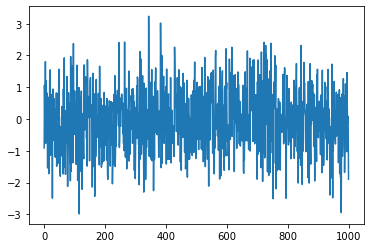

In [45]:
import matplotlib.pyplot as plt

# 随机生成1000个数据
data = pd.Series(np.random.randn(1000),index=np.arange(1000))

# 为了方便观看效果, 我们累加这个数据
data = data.cumsum()
# pandas 数据可以直接观看其可视化形式
data.plot()
plt.show()

            A          B          C         D
0   -1.260401   1.420870  -0.889887 -0.720741
1   -1.338493   1.357655  -1.502919 -0.844848
2   -1.766511   0.754742  -2.736778 -0.180079
3   -2.012155   0.091940  -3.806876 -0.544455
4   -2.529165  -1.230141  -3.886788 -0.278554
..        ...        ...        ...       ...
995  4.960330  31.178477  14.196562  6.702659
996  2.260032  30.178580  11.536383  5.803273
997  1.952293  30.488350  11.299188  5.968856
998  2.624762  31.867253  13.306427  6.087710
999  0.874949  32.225874  12.539938  5.842871

[1000 rows x 4 columns]


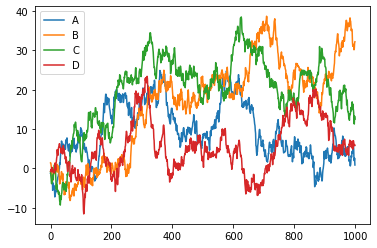

'\n除了plot，我经常会用到还有scatter，这个会显示散点图，首先给大家说一下在 pandas 中有多少种方法\nbar\nhist\nbox\nkde\narea\nscatter\nhexbin\n'

In [42]:
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
data = data.cumsum()
print(data)
data.plot()
plt.show()

"""
除了plot，我经常会用到还有scatter，这个会显示散点图，首先给大家说一下在 pandas 中有多少种方法
bar
hist
box
kde
area
scatter
hexbin
"""

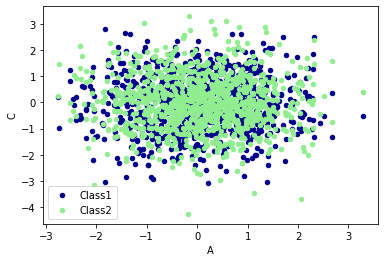

In [39]:
# scatter只有x，y两个属性，我们我们就可以分别给x, y指定数据
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()